In [507]:
import numpy as np
import seaborn as sns
import pandas as pd

# global variables
BOARD_ROWS = 9
BOARD_COLS = 9
WIN_STATE = (8, 8)
LOSE_STATE = (6, 5)
START = (0, 0)
DETERMINISTIC = True

# environment
class Grid_world():
    def __init__(self, state=START):
        self.board = np.zeros([BOARD_ROWS, BOARD_COLS])
        self.board[WIN_STATE] = 50
        self.board[LOSE_STATE] = -50
        self.state = state
        self.isEnd = False
        self.determine = DETERMINISTIC
        self.setWall()
    
    def setWall(self):
        # set wall
        self.board[1, 2:7] = -1
        self.board[1:6, 6] = -1
        self.board[7, 1:5] = -1
        
#     def giveReward(self):
#         if self.state == WIN_STATE:
#             return 50
#         elif self.state == LOSE_STATE:
#             return -50
#         else:
#             return 0
        
    def getReward(self, s):
        if s == WIN_STATE:
            return 50
        elif s == LOSE_STATE:
            return -50
        else:
            return -1

    def isEndFunc(self):
        if (self.state == WIN_STATE) or (self.state == LOSE_STATE):
            self.isEnd = True

    def nxtPosition(self, action):
        """
        action: north, south, west, east
        -------------
        0 | 1 | 2| 3|
        1 |
        2 |
        return next position
        """
        if self.determine:
            if action == "north":
                nxtState = (self.state[0] - 1, self.state[1])
            elif action == "south":
                nxtState = (self.state[0] + 1, self.state[1])
            elif action == "west":
                nxtState = (self.state[0], self.state[1] - 1)
            elif action == "east":
                nxtState = (self.state[0], self.state[1] + 1)
            # if next state legal
            if (nxtState[0] >= 0) and (nxtState[0] <= (BOARD_ROWS -1)):
                if (nxtState[1] >= 0) and (nxtState[1] <= (BOARD_COLS -1)):
                    if self.board[nxtState[0], nxtState[1]] != -1:
                        return nxtState
            return self.state

    def showBoard(self):
        self.board[self.state] = 1
        for i in range(0, BOARD_ROWS):
            print('-------------------------------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                if self.board[i, j] == 1:
                    token = '*'
                if self.board[i, j] == -1:
                    token = 'A'
                if self.board[i, j] == 0:
                    token = 'o'
                if self.board[i, j] == 50:
                    token = 'W'
                if self.board[i, j] == -50:
                    token = 'L'
                out += token + ' | '
            print(out)
        print('-------------------------------------')
        
def plotHeat(value, title, save):
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.set_theme()
    ax = sns.heatmap(value, annot=True, fmt='.1f')
    ax.set_title(title, fontsize = 23)
    fig.savefig(save, dpi=100)
    
world = Grid_world()
world.showBoard()

-------------------------------------
| * | o | o | o | o | o | o | o | o | 
-------------------------------------
| o | o | A | A | A | A | A | o | o | 
-------------------------------------
| o | o | o | o | o | o | A | o | o | 
-------------------------------------
| o | o | o | o | o | o | A | o | o | 
-------------------------------------
| o | o | o | o | o | o | A | o | o | 
-------------------------------------
| o | o | o | o | o | o | A | o | o | 
-------------------------------------
| o | o | o | o | o | L | o | o | o | 
-------------------------------------
| o | A | A | A | A | o | o | o | o | 
-------------------------------------
| o | o | o | o | o | o | o | o | W | 
-------------------------------------


current position (0, 0) action east
nxt state (0, 1)
----------------------------------------------------------------------
current position (0, 1) action west
nxt state (0, 0)
----------------------------------------------------------------------
current position (0, 0) action north
nxt state (0, 0)
----------------------------------------------------------------------
current position (0, 0) action east
nxt state (0, 1)
----------------------------------------------------------------------
current position (0, 1) action east
nxt state (0, 2)
----------------------------------------------------------------------
current position (0, 2) action east
nxt state (0, 3)
----------------------------------------------------------------------
current position (0, 3) action north
nxt state (0, 3)
----------------------------------------------------------------------
current position (0, 3) action east
nxt state (0, 4)
----------------------------------------------------------------------
curren

current position (0, 2) action east
nxt state (0, 3)
----------------------------------------------------------------------
current position (0, 3) action north
nxt state (0, 3)
----------------------------------------------------------------------
current position (0, 3) action west
nxt state (0, 2)
----------------------------------------------------------------------
current position (0, 2) action south
nxt state (0, 2)
----------------------------------------------------------------------
current position (0, 2) action west
nxt state (0, 1)
----------------------------------------------------------------------
current position (0, 1) action east
nxt state (0, 2)
----------------------------------------------------------------------
current position (0, 2) action east
nxt state (0, 3)
----------------------------------------------------------------------
current position (0, 3) action east
nxt state (0, 4)
----------------------------------------------------------------------
curren

current position (0, 2) action north
nxt state (0, 2)
----------------------------------------------------------------------
current position (0, 2) action south
nxt state (0, 2)
----------------------------------------------------------------------
current position (0, 2) action south
nxt state (0, 2)
----------------------------------------------------------------------
current position (0, 2) action west
nxt state (0, 1)
----------------------------------------------------------------------
current position (0, 1) action west
nxt state (0, 0)
----------------------------------------------------------------------
current position (0, 0) action south
nxt state (1, 0)
----------------------------------------------------------------------
current position (1, 0) action north
nxt state (0, 0)
----------------------------------------------------------------------
current position (0, 0) action east
nxt state (0, 1)
----------------------------------------------------------------------
cur

----------------------------------------------------------------------
current position (8, 2) action east
nxt state (8, 3)
----------------------------------------------------------------------
current position (8, 3) action north
nxt state (8, 3)
----------------------------------------------------------------------
current position (8, 3) action west
nxt state (8, 2)
----------------------------------------------------------------------
current position (8, 2) action south
nxt state (8, 2)
----------------------------------------------------------------------
current position (8, 2) action south
nxt state (8, 2)
----------------------------------------------------------------------
current position (8, 2) action south
nxt state (8, 2)
----------------------------------------------------------------------
current position (8, 2) action east
nxt state (8, 3)
----------------------------------------------------------------------
current position (8, 3) action south
nxt state (8, 3)
---

nxt state (6, 2)
----------------------------------------------------------------------
current position (6, 2) action north
nxt state (5, 2)
----------------------------------------------------------------------
current position (5, 2) action west
nxt state (5, 1)
----------------------------------------------------------------------
current position (5, 1) action north
nxt state (4, 1)
----------------------------------------------------------------------
current position (4, 1) action east
nxt state (4, 2)
----------------------------------------------------------------------
current position (4, 2) action south
nxt state (5, 2)
----------------------------------------------------------------------
current position (5, 2) action west
nxt state (5, 1)
----------------------------------------------------------------------
current position (5, 1) action west
nxt state (5, 0)
----------------------------------------------------------------------
current position (5, 0) action north
nxt 

current position (5, 1) action south
nxt state (6, 1)
----------------------------------------------------------------------
current position (6, 1) action west
nxt state (6, 0)
----------------------------------------------------------------------
current position (6, 0) action west
nxt state (6, 0)
----------------------------------------------------------------------
current position (6, 0) action south
nxt state (7, 0)
----------------------------------------------------------------------
current position (7, 0) action west
nxt state (7, 0)
----------------------------------------------------------------------
current position (7, 0) action south
nxt state (8, 0)
----------------------------------------------------------------------
current position (8, 0) action east
nxt state (8, 1)
----------------------------------------------------------------------
current position (8, 1) action east
nxt state (8, 2)
----------------------------------------------------------------------
curre

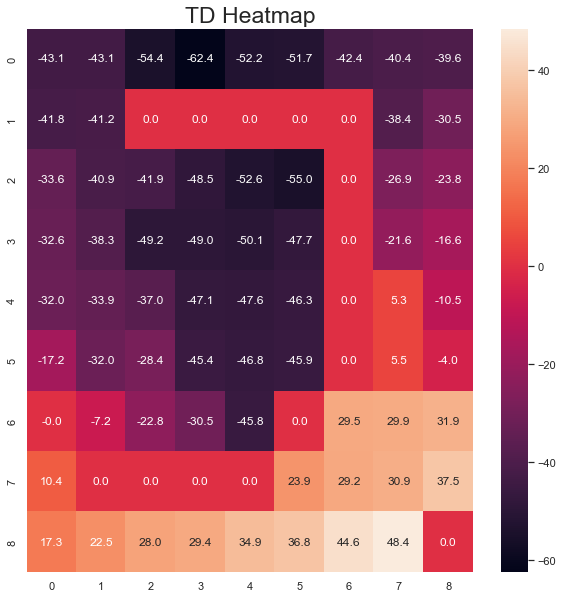

In [525]:
# TD Value iteration
class Agent:

    def __init__(self, alpha=0.5, epsilon=0.7):
        self.states = []
        self.actions = ["north", "south", "west", "east"]
        self.State = Grid_world()
        self.alpha = alpha
        self.epsilon = epsilon

        # initial state reward
        self.state_values = {}
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.state_values[(i, j)] = 0  # set initial value to 0

    def chooseAction(self):
        # choose action with most expected value
        max_nxt_reward = -100
        action = ""

        if np.random.random() <= self.epsilon:
            action = np.random.choice(self.actions)
        else:
            # greedy action
            for a in self.actions:
                # if the action is deterministic
                nxt_reward = self.state_values[self.State.nxtPosition(a)]
                if nxt_reward >= max_nxt_reward:
                    action = a
                    max_nxt_reward = nxt_reward
        return action

    def takeAction(self, action):
        position = self.State.nxtPosition(action)
        return Grid_world(state=position)

    def reset(self):
        self.states = []
        self.State = Grid_world()

    def play(self, rounds=10):
        i = 0
        self.states.append(self.State.state)
        while i < rounds:
            # to the end of game back propagate reward
            if self.State.isEnd:
                # back propagate
                reward = self.State.getReward(self.State.state)
                V = 0
                # explicitly assign end state to reward values
                self.state_values[self.State.state] = reward  # this is optional
                print("Game End Reward", reward)
                for s in reversed(self.states):
                    # back propagate
                    reward = self.State.getReward(s)
                    V = self.state_values[s] + self.alpha * (V + reward - self.state_values[s])
                    self.state_values[s] = round(V, 2)
                self.reset()
                self.states.append(self.State.state)
                i += 1
            else:
                action = self.chooseAction()
                # append trace
                self.states.append(self.State.nxtPosition(action))
                print("current position {} action {}".format(self.State.state, action))
                # by taking the action, it reaches the next state
                self.State = self.takeAction(action)
                # mark is end
                self.State.isEndFunc()
                print("nxt state", self.State.state)
                print('----------------------------------------------------------------------')

    def showValues(self):
        for i in range(0, BOARD_ROWS):
            print('--------------------------------------------------------------------------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                out += str(self.state_values[(i, j)]).ljust(6) + ' | '
            print(out)
        print('--------------------------------------------------------------------------------')
        
ag = Agent(0.5, 0.7)
ag.play(50)
ag.showValues()
V = np.zeros((BOARD_ROWS, BOARD_COLS))
for i in range(0, BOARD_ROWS):
    for j in range(0, BOARD_COLS):
        V[i,j] = ag.state_values[(i, j)]
V[6,5] = 0
V[8,8] = 0
save = 'TD_MC.png'
title = "TD Heatmap"
plotHeat(V, title, save)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:49<00:00, 202.29it/s]


[[ -2.     -2.     -2.     -2.     -2.     -2.     -2.     -2.     -2.   ]
 [ -2.     -2.001   0.      0.      0.      0.      0.     -2.001  -1.999]
 [ -2.001  -2.005  -2.02   -2.057  -2.159  -2.303   0.     -2.004  -1.995]
 [ -2.004  -2.014  -2.066  -2.239  -2.687  -3.411   0.     -1.998  -1.962]
 [ -2.012  -2.052  -2.226  -2.921  -5.041  -9.479   0.     -2.03   -1.784]
 [ -2.033  -2.144  -2.668  -5.065 -13.33  -34.056   0.     -2.435  -0.8  ]
 [ -2.048  -2.281  -3.563  -9.663 -34.088   0.    -27.975  -4.632   4.218]
 [ -2.008   0.      0.      0.      0.    -28.285  -8.214   5.071  28.415]
 [ -2.003  -2.012  -2.068  -2.336  -3.576  -7.39    1.492  25.306   0.   ]]


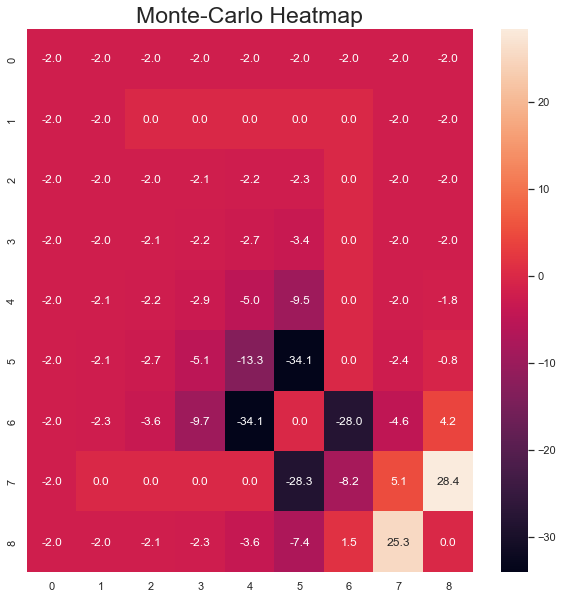

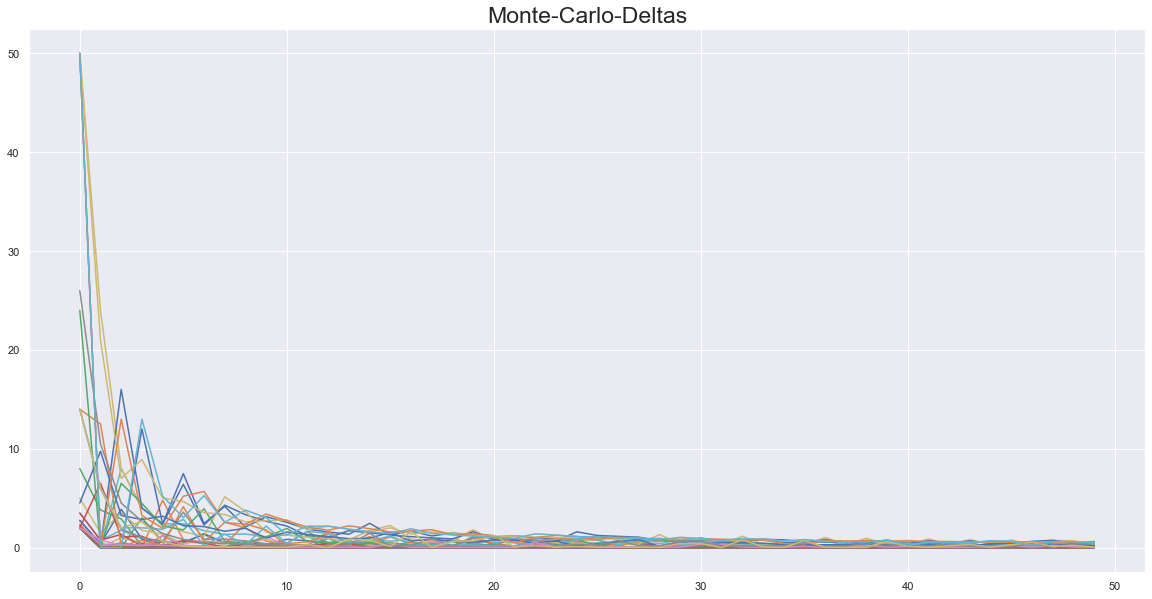

In [508]:
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

# Monte Carlo policy iteration
class Agent:

    def __init__(self, gamma):
        self.states = []
        self.actions = ["north", "south", "west", "east"]
        self.State = Grid_world()
        self.gamma = gamma
        self.selective_state = []
        self.G = 0
#         self.terminal_state = []
        
        # initial state reward
        self.state_values = {}
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.state_values[(i, j)] = 0  # set initial value to 0
        for i in range(0, BOARD_ROWS):
            for j in range(0, BOARD_COLS):
                if self.State.board[i, j] != -1 and  self.State.board[i, j] != 50 and  self.State.board[i, j] != -50:
                    self.selective_state.append([i, j])
#                 if self.State.board[i, j] == 50 or self.State.board[i, j] == -50:
#                     self.terminal_state.append([i, j])
    
    def generateInitialState(self):
        self.State.state = random.choice(self.selective_state)
    
    def chooseAction(self):
        # choose action, all four actions have the same probability
        action = np.random.choice(self.actions)
        return action
    
    def takeAction(self, action):
        position = self.State.nxtPosition(action)
        return Grid_world(state=position)

    def reset(self):
        self.states = []
        self.State = Grid_world()
        
    def generateEpisode(self):
        self.generateInitialState()
        self.State.isEndFunc()
        episode = []
        while True:
            if self.State.isEnd: 
                return episode
            action = self.chooseAction()
            nxt_state = self.State.nxtPosition(action)
            reward = self.State.getReward(nxt_state)
            episode.append([list(self.State.state), action, reward, list(nxt_state)])
            self.State = self.takeAction(action)
            self.State.isEndFunc()
            
    def play(self, iterations=1000):
        V = np.zeros((BOARD_ROWS, BOARD_COLS))
        returns = {(i, j):[] for i in range(BOARD_ROWS) for j in range(BOARD_COLS)}
        deltas = {(i, j):[] for i in range(BOARD_ROWS) for j in range(BOARD_COLS)}
        for it in tqdm(range(iterations)):
            self.reset()
            episode = self.generateEpisode()
#             print(episode)
#             print(episode[::-1])
            self.G = 0
            for index, step in enumerate(episode[::-1]):
                self.G = self.gamma*self.G + step[2]
                if step[0] not in [x[0] for x in episode[len(episode)-index:]]:
                    idx = (step[0][0], step[0][1])
                    returns[idx].append(self.G)
                    new_value = np.average(returns[idx])
                    old_value = V[idx[0], idx[1]]
                    deltas[idx[0], idx[1]].append(np.abs(old_value - new_value))
                    V[idx[0], idx[1]] = round(newValue, 2)
        return V, deltas
                    

ag = Agent(0.5)
V, deltas = ag.play(10000)
print(V)
save = 'MC_HM10000.png'
title = "Monte-Carlo Heatmap"
plotHeat(V, title, save)

# using gamma = 0.77
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
plt.title("Monte-Carlo-Deltas", fontsize = 23)
for series in all_series:
    plt.plot(series)
    plt.savefig('Deltas_MC_10000_0.5.png', dpi=100)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:55<00:00, 180.33it/s]


[[-143.35  -135.595 -144.277 -144.192 -140.19  -131.42  -115.522  -97.106
   -97.923]
 [-131.516 -125.781    0.       0.       0.       0.       0.     -85.647
   -84.514]
 [-121.848 -110.425 -110.468 -110.643 -113.088 -118.773    0.     -73.376
   -75.354]
 [-116.952 -105.397 -100.314  -99.546  -99.886 -105.458    0.     -62.46
   -64.344]
 [-112.664 -103.593  -96.205  -91.555  -89.633  -94.08     0.     -50.445
   -51.844]
 [-111.13  -100.939  -93.492  -87.618  -80.387  -78.095    0.     -37.194
   -37.834]
 [-113.567 -106.865 -101.213  -91.641  -78.291    0.     -38.714  -26.486
   -19.679]
 [-124.549    0.       0.       0.       0.     -45.98   -32.335  -15.052
     4.436]
 [-123.701 -118.007 -103.318  -89.674  -73.872  -48.446  -28.658   -0.96
     0.   ]]


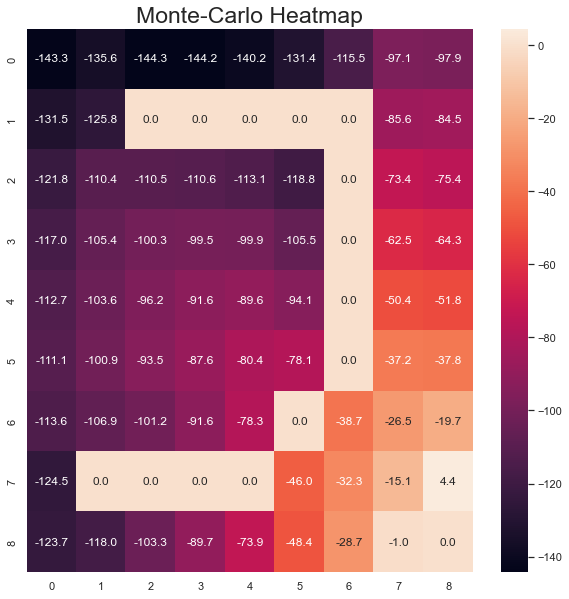

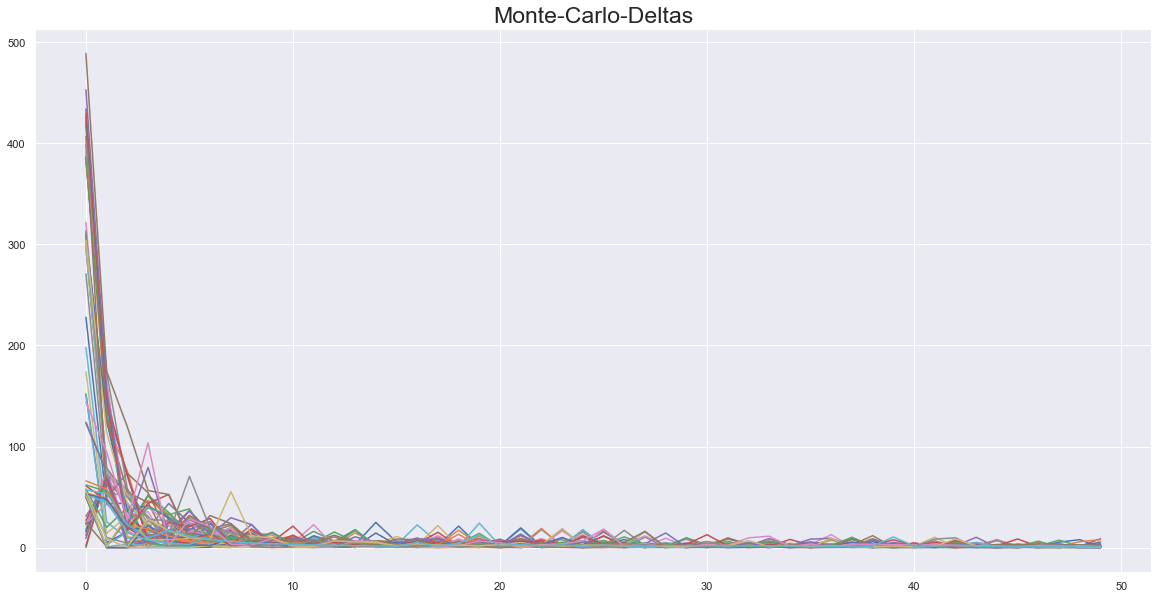

In [510]:
ag = Agent(1)
V, deltas = ag.play(10000)
print(V)
save = 'MC_HM10000_1.png'
title = "Monte-Carlo Heatmap"
plotHeat(V, title, save)

# using gamma = 1
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in deltas.values()]
plt.title("Monte-Carlo-Deltas", fontsize = 23)
for series in all_series:
    plt.plot(series)
    plt.savefig('Deltas_MC_10000_1.png', dpi=100)

In [527]:
# SARSA
class Agent:

    def __init__(self, alpha=0.5, epsilon=0.3, gamma=0.9):
        self.episode = []
        self.actions = ["north", "south", "west", "east"]
        self.State = Grid_world()
        self.isEnd = self.State.isEnd
        self.alpha = alpha
        self.epsilon = epsilon
        self.gamma = gamma
        self.selective_state = []
        self.count = 0
#         self.terminal_state = []
        
        # initial state reward
        self.state_values = {}
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.state_values[(i, j)] = 0  # set initial value to 0
        for i in range(0, BOARD_ROWS):
            for j in range(0, BOARD_COLS):
                if self.State.board[i, j] != -1 and  self.State.board[i, j] != 50 and  self.State.board[i, j] != -50:
                    self.selective_state.append((i, j))
        # initial Q values
        self.Q_values = {}
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.Q_values[(i, j)] = {}
                for a in self.actions:
                    self.Q_values[(i, j)][a] = 0  # Q value is a dict of dict
        # initial deltas         
        self.deltas = {(i, j):[] for i in range(BOARD_ROWS) for j in range(BOARD_COLS)}
        
                    
    def generateInitialState(self):
        self.State.state = random.choice(self.selective_state)
        self.count += 1

    def chooseAction(self):
        # choose action with most expected value
        max_nxt_q = -100
        action = ""

        if np.random.random() <= self.epsilon:
            action = np.random.choice(self.actions)
        else:
            # greedy action
            for a in self.actions:
                # if the action is deterministic
                current_state = self.State.state
                nxt_q = self.Q_values[current_state][a]
#                 nxt_reward = self.state_values[self.State.nxtPosition(a)]
                if nxt_q >= max_nxt_q:
                    action = a
                    max_nxt_q = nxt_q
        return action
    
    def takeAction(self, action):
        position = self.State.nxtPosition(action)
        return Grid_world(state=position)
    
    def chooseNxtAction(self, nxt_state):
        # choose action with most expected value
        max_nxt_q = -100
        action = ""

        if np.random.random() <= self.epsilon:
            action = np.random.choice(self.actions)
        else:
            # greedy action
            for a in self.actions:
                # if the action is deterministic
                nxt_q = self.Q_values[nxt_state][a]
                if nxt_q >= max_nxt_q:
                    action = a
                    max_nxt_q = nxt_q
        return action

    def reset(self):
        self.states = []
        self.State = Grid_world()
        self.isEnd = self.State.isEnd
        self.generateInitialState()
        
    def play(self, iterations=1000):
#         self.generateInitialState()
        for it in tqdm(range(iterations)):
            while not self.State.isEnd:
                action = self.chooseAction()
                # append trace
#                 print("current position {} action {}".format(self.State.state, action))
                nxt_state = self.State.nxtPosition(action)
                reward = self.State.getReward(nxt_state)
                self.episode.append([(self.State.state), action, reward, (nxt_state)])
                # by taking the action, it reaches the next state
                self.State = self.takeAction(action)
                # mark is end
                self.State.isEndFunc()
#                 print("nxt state", self.State.state)
#                 print("---------------------")
                self.isEnd = self.State.isEnd
                
            if self.State.isEnd:
                for a in self.actions:
                    self.Q_values[self.State.state][a] = reward
#                 print("Game End Reward", reward)
                for step in reversed(self.episode):
                    idx = (step[0][0], step[0][1])
                    action = step[1]
                    nxt_idx = (step[3][0], step[3][1])
                    current_q_value = self.Q_values[idx][action]
                    a_prime = self.chooseNxtAction(nxt_idx)
                    nxt_q_value = self.Q_values[nxt_idx][a_prime]
                    new_q_value = current_q_value + self.alpha * (step[2] + self.gamma * nxt_q_value - current_q_value)
                    self.Q_values[idx][action] = round(new_q_value, 3)
                    self.deltas[idx[0], idx[1]].append(np.abs(current_q_value - new_q_value))
#                 print(self.Q_values)
                self.reset()
ag = Agent()
ag.play(1000)
print(ag.Q_values)
print(ag.count)
# print(V)
# plotHeat(V)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:22<00:00, 12.14it/s]

{(0, 0): {'north': 1.884, 'south': 1.182, 'west': 2.715, 'east': 3.839}, (0, 1): {'north': 3.671, 'south': 2.472, 'west': 1.374, 'east': 4.816}, (0, 2): {'north': 5.135, 'south': 5.796, 'west': 1.811, 'east': 5.558}, (0, 3): {'north': 8.108, 'south': 8.237, 'west': 4.765, 'east': 10.54}, (0, 4): {'north': 9.631, 'south': 10.867, 'west': 8.743, 'east': 13.167}, (0, 5): {'north': 15.415, 'south': 14.666, 'west': 10.925, 'east': 17.846}, (0, 6): {'north': 18.627, 'south': 18.453, 'west': 15.26, 'east': 21.239}, (0, 7): {'north': 20.566, 'south': 26.505, 'west': 17.355, 'east': 23.992}, (0, 8): {'north': 24.78, 'south': 28.74, 'west': 21.394, 'east': 24.445}, (1, 0): {'north': 2.7, 'south': 3.416, 'west': 1.472, 'east': 1.559}, (1, 1): {'north': 2.549, 'south': 1.642, 'west': 0.923, 'east': 1.311}, (1, 2): {'north': 0, 'south': 0, 'west': 0, 'east': 0}, (1, 3): {'north': 0, 'south': 0, 'west': 0, 'east': 0}, (1, 4): {'north': 0, 'south': 0, 'west': 0, 'east': 0}, (1, 5): {'north': 0, 'sout

[[ 3.839  4.816  5.796 10.54  13.167 17.846 21.239 26.505 28.74 ]
 [ 3.416  2.549  0.     0.     0.     0.     0.    30.429 33.013]
 [ 7.064  4.765  4.637  2.802  1.309 -0.207  0.    35.855 40.   ]
 [ 9.934  7.603  5.647  4.32   2.846  1.407  0.    37.518 43.972]
 [12.341 10.1    7.589  5.863  4.241  2.535  0.    47.718 48.386]
 [15.451 12.521 10.011  7.879  4.831  3.348  0.    63.416 74.314]
 [18.739 15.859 13.108  8.227  5.698  0.    64.018 73.015 84.123]
 [22.579  0.     0.     0.     0.    64.142 72.919 84.496 94.999]
 [30.67  36.07  43.038 50.921 60.741 71.611 84.141 94.999  0.   ]]
[['east', 'east', 'south', 'east', 'east', 'east', 'east', 'south', 'south'], ['south', 'north', 'WALL', 'WALL', 'WALL', 'WALL', 'WALL', 'south', 'south'], ['south', 'south', 'south', 'south', 'south', 'south', 'WALL', 'east', 'south'], ['south', 'south', 'west', 'south', 'west', 'west', 'WALL', 'east', 'south'], ['south', 'west', 'south', 'west', 'west', 'west', 'WALL', 'south', 'south'], ['south', 'w

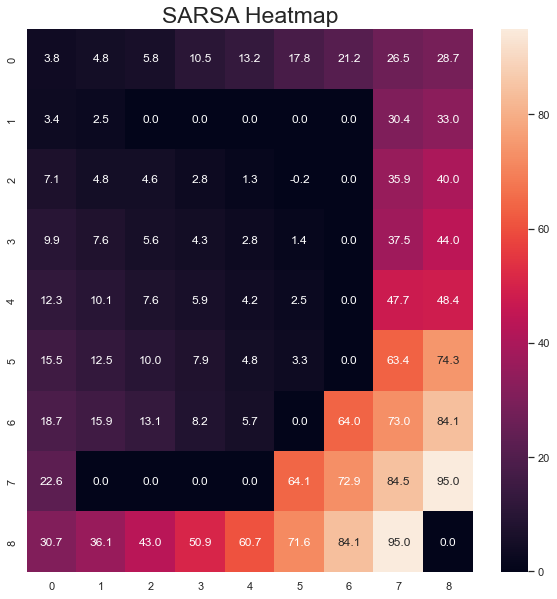

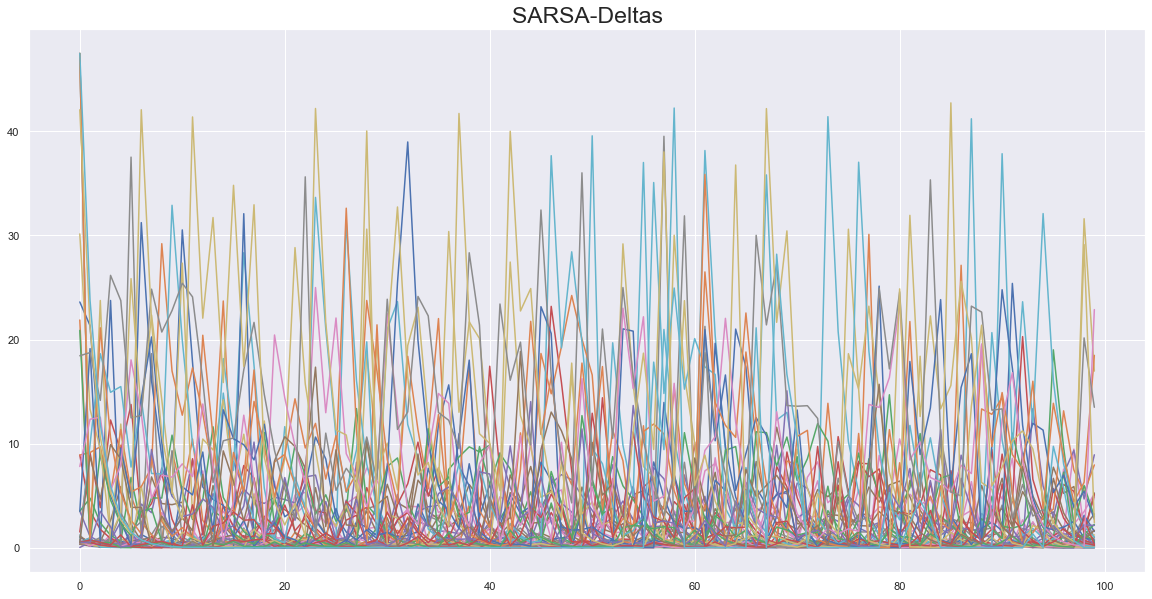

In [534]:
actions = ag.actions
V_sarsa = np.zeros((BOARD_ROWS, BOARD_COLS))
P_sarsa = [['']*BOARD_ROWS for _ in range(BOARD_COLS)]
for (i,j) in ag.Q_values:
    max_q = -100
    action = ""
    for a in actions:
        if ag.State.board[(i,j)] == -1:
            action  = "WALL"
            max_q = 0
        elif ag.State.board[(i,j)] == -50:
            action  = "LOSS"
            max_q = 0
        elif ag.State.board[(i,j)] == 50:
            action  = "WIN"
            max_q = 0
        else:
            q = ag.Q_values[(i,j)][a]
            if q >= max_q:
                max_q = q
                action = a
    V_sarsa[i,j] = max_q
    P_sarsa[i][j] = action
print(V_sarsa)
print(P_sarsa)
title = "SARSA Heatmap"
save = "SARSA_HM.png"
plotHeat(V_sarsa, title, save)
plt.figure(figsize=(20,10))
all_series = [list(x)[:100] for x in ag.deltas.values()]
plt.title("SARSA-Deltas", fontsize = 23)
for series in all_series:
    plt.plot(series)
    plt.savefig('Deltas_SARSA.png', dpi=100)

def showValues(P_sarsa):
    for i in range(0, BOARD_ROWS):
        print('----------------------------------------------------------------------------------')
        out = '| '
        for j in range(0, BOARD_COLS):
            out += str(P_sarsa[i][j]).ljust(6) + ' | '
        print(out)
    print('----------------------------------------------------------------------------------')
showValues(P_sarsa)

In [535]:
# Q-learning
class Agent:

    def __init__(self, alpha=0.5, epsilon=0.3, gamma=0.9):
        self.episode = []
        self.actions = ["north", "south", "west", "east"]
        self.State = Grid_world()
        self.isEnd = self.State.isEnd
        self.alpha = alpha
        self.epsilon = epsilon
        self.gamma = gamma
        self.selective_state = []
        self.count = 0
#         self.terminal_state = []
        
        # initial state reward
        self.state_values = {}
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.state_values[(i, j)] = 0  # set initial value to 0
        for i in range(0, BOARD_ROWS):
            for j in range(0, BOARD_COLS):
                if self.State.board[i, j] != -1 and  self.State.board[i, j] != 50 and  self.State.board[i, j] != -50:
                    self.selective_state.append((i, j))
        # initial Q values
        self.Q_values = {}
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.Q_values[(i, j)] = {}
                for a in self.actions:
                    self.Q_values[(i, j)][a] = 0  # Q value is a dict of dict
        # initial deltas         
        self.deltas = {(i, j):[] for i in range(BOARD_ROWS) for j in range(BOARD_COLS)}
        
                    
    def generateInitialState(self):
        self.State.state = random.choice(self.selective_state)
        self.count += 1

    def chooseAction(self):
        # choose action with most expected value
        max_nxt_q = -100
        action = ""

        if np.random.random() <= self.epsilon:
            action = np.random.choice(self.actions)
        else:
            # greedy action
            for a in self.actions:
                # if the action is deterministic
                current_state = self.State.state
                nxt_q = self.Q_values[current_state][a]
#                 nxt_reward = self.state_values[self.State.nxtPosition(a)]
                if nxt_q >= max_nxt_q:
                    action = a
                    max_nxt_q = nxt_q
        return action
    
    def takeAction(self, action):
        position = self.State.nxtPosition(action)
        return Grid_world(state=position)

    def reset(self):
        self.states = []
        self.State = Grid_world()
        self.isEnd = self.State.isEnd
        self.generateInitialState()
        
    def play(self, iterations=1000):
#         self.generateInitialState()
        for it in tqdm(range(iterations)):
            while not self.State.isEnd:
                action = self.chooseAction()
                # append trace
#                 print("current position {} action {}".format(self.State.state, action))
                nxt_state = self.State.nxtPosition(action)
                reward = self.State.getReward(nxt_state)
                self.episode.append([(self.State.state), action, reward, (nxt_state)])
                # by taking the action, it reaches the next state
                self.State = self.takeAction(action)
                # mark is end
                self.State.isEndFunc()
#                 print("nxt state", self.State.state)
#                 print("---------------------")
                self.isEnd = self.State.isEnd
                
            if self.State.isEnd:
                for a in self.actions:
                    self.Q_values[self.State.state][a] = reward
#                 print("Game End Reward", reward)
                for step in reversed(self.episode):
                    idx = (step[0][0], step[0][1])
                    action = step[1]
                    nxt_idx = (step[3][0], step[3][1])
                    current_q_value = self.Q_values[idx][action]
                    max_nxt_q = 0
                    for a_prime in self.Q_values[nxt_idx]:
                        nxt_q_value = self.Q_values[nxt_idx][a_prime]
                        if nxt_q_value > max_nxt_q:
                            max_nxt_q = nxt_q_value
                    new_q_value = current_q_value + self.alpha * (step[2] + self.gamma * max_nxt_q - current_q_value)
                    self.Q_values[idx][action] = round(new_q_value, 3)
                    self.deltas[idx[0], idx[1]].append(np.abs(current_q_value - new_q_value))
#                 print(self.Q_values)
                self.reset()
ag_q = Agent()
ag_q.play(1000)
print(ag_q.Q_values)
print(ag_q.count)
# print(V)
# plotHeat(V)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:22<00:00, 45.03it/s]

{(0, 0): {'north': 9.454, 'south': 11.616, 'west': 9.454, 'east': 11.616}, (0, 1): {'north': 11.616, 'south': 9.454, 'west': 9.454, 'east': 14.018}, (0, 2): {'north': 14.018, 'south': 14.018, 'west': 11.616, 'east': 16.687}, (0, 3): {'north': 16.687, 'south': 16.687, 'west': 14.018, 'east': 19.653}, (0, 4): {'north': 19.653, 'south': 19.653, 'west': 16.687, 'east': 22.948}, (0, 5): {'north': 22.948, 'south': 22.948, 'west': 19.653, 'east': 26.609}, (0, 6): {'north': 26.609, 'south': 26.609, 'west': 22.948, 'east': 30.677}, (0, 7): {'north': 30.677, 'south': 35.197, 'west': 26.609, 'east': 35.197}, (0, 8): {'north': 35.197, 'south': 40.219, 'west': 30.677, 'east': 35.197}, (1, 0): {'north': 9.454, 'south': 14.018, 'west': 11.616, 'east': 9.454}, (1, 1): {'north': 11.616, 'south': 11.616, 'west': 11.616, 'east': 9.454}, (1, 2): {'north': 0, 'south': 0, 'west': 0, 'east': 0}, (1, 3): {'north': 0, 'south': 0, 'west': 0, 'east': 0}, (1, 4): {'north': 0, 'south': 0, 'west': 0, 'east': 0}, (1

[[11.616 14.018 16.687 19.653 22.948 26.609 30.677 35.197 40.219]
 [14.018 11.616  0.     0.     0.     0.     0.    40.219 45.8  ]
 [16.687 14.018 11.616  9.454  7.508  5.757  0.    45.8   52.   ]
 [19.653 16.687 14.018 11.616  9.454  7.508  0.    52.    58.889]
 [22.948 19.653 16.687 14.018 11.616  9.454  0.    58.889 66.544]
 [26.609 22.948 19.653 16.687 14.018 11.616  0.    66.544 75.049]
 [30.677 26.609 22.948 19.653 16.687  0.    66.544 75.049 84.499]
 [35.197  0.     0.     0.     0.    66.544 75.049 84.499 94.999]
 [40.219 45.8   52.    58.889 66.544 75.049 84.499 94.999  0.   ]]
[['east', 'east', 'east', 'east', 'east', 'east', 'east', 'east', 'south'], ['south', 'west', 'WALL', 'WALL', 'WALL', 'WALL', 'WALL', 'east', 'south'], ['south', 'west', 'west', 'west', 'west', 'west', 'WALL', 'east', 'south'], ['south', 'west', 'west', 'west', 'west', 'west', 'WALL', 'east', 'south'], ['south', 'west', 'west', 'west', 'west', 'west', 'WALL', 'east', 'south'], ['south', 'west', 'west',

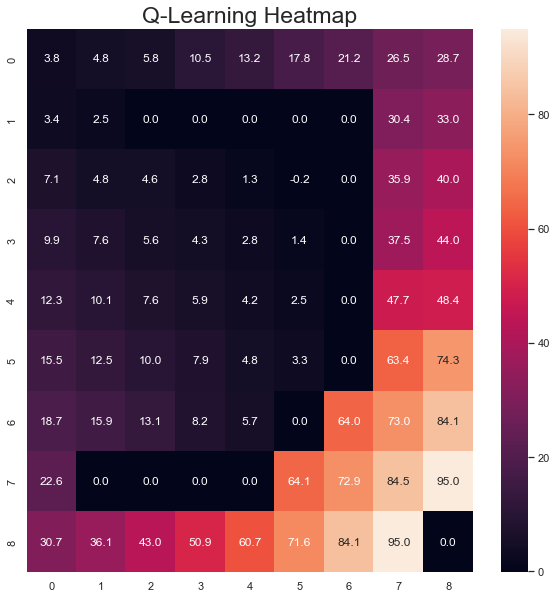

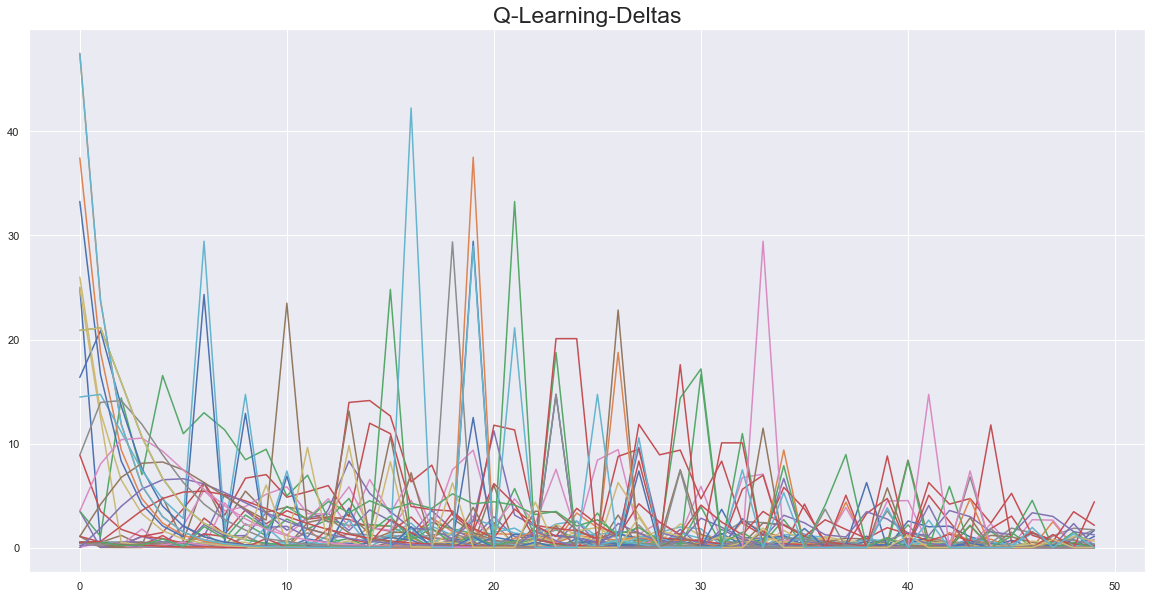

In [536]:
actions = ag_q.actions
V_q = np.zeros((BOARD_ROWS, BOARD_COLS))
P_q = [['']*BOARD_ROWS for _ in range(BOARD_COLS)]
for (i,j) in ag_q.Q_values:
    max_q = -100
    action = ""
    for a in actions:
        if ag_q.State.board[(i,j)] == -1:
            action  = "WALL"
            max_q = 0
        elif ag_q.State.board[(i,j)] == -50:
            action  = "LOSS"
            max_q = 0
        elif ag_q.State.board[(i,j)] == 50:
            action  = "WIN"
            max_q = 0
        else:
            q = ag_q.Q_values[(i,j)][a]
            if q >= max_q:
                max_q = q
                action = a
    V_q[i,j] = max_q
    P_q[i][j] = action
print(V_q)
print(P_q)
title = "Q-Learning Heatmap"
save = "Q_HM.png"
plotHeat(V_sarsa, title, save)
plt.figure(figsize=(20,10))
all_series = [list(x)[:50] for x in ag_q.deltas.values()]
plt.title("Q-Learning-Deltas", fontsize = 23)
for series in all_series:
    plt.plot(series)
    plt.savefig('Deltas_Q.png', dpi=100)
    
showValues(P_q)